In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from urllib import request
from os import path

from datetime import date,datetime
from datetime import timedelta



In [61]:
#import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import statsmodels.formula.api as smf  # regression


In [62]:
durl='https://covid.ourworldindata.org/data/owid-covid-data.csv'
d2url='https://covid19.who.int/WHO-COVID-19-global-table-data.csv'

def make_file(link):
    response= request.urlopen(link)
    csv=response.read()
    csvline=str(csv)
    lines=csvline.split("\\n")

    tourl=r'mycsv.csv'
    fx=open(tourl,'w')
    for line in lines:
        fx.write(line + '\n')
        
    fx.close()
    print('File 1 Created, DONE!!! \n')

make_file(durl)

File 1 Created, DONE!!! 



In [63]:
def make_file2(link):
    response= request.urlopen(link)
    csv=response.read()
    csvline=str(csv)
    lines=csvline.split("\\n")

    tourl=r'123.csv'
    fx=open(tourl,'w')
    for line in lines:
        fx.write(line + '\n')
        
    fx.close()
    print('File 2 Created, DONE!!! \n')

make_file2(d2url)

File 2 Created, DONE!!! 



In [28]:
df= pd.read_csv('/home/sourabh/projects/covid/mycsv.csv', sep=',', engine='python',na_values='nan', keep_default_na=False)
df1= pd.read_csv('/home/sourabh/projects/covid/123.csv', sep=',', engine='python',na_values='nan', keep_default_na=False)

# #OVERVIEW OF DATA

In [14]:
#df.info()

In [15]:
df.head()

,iso,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1,1,,,,,...,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1,0,,,,,...,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1,0,,,,,...,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1,0,,,,,...,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1,0,,,,,...,1803.987,,597.029,9.59,,,37.746,0.5,64.83,0.498


In [23]:
df.tail()

,iso,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
57988,ZWE,Africa,Zimbabwe,2020-12-31,13867,242,154.429,363,3,3.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57989,ZWE,Africa,Zimbabwe,2021-01-01,14084,217,172,369,6,4,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57990,ZWE,Africa,Zimbabwe,2021-01-02,14491,407,218.286,377,8,5.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57991,ZWE,Africa,Zimbabwe,2021-01-03,15265,774,312.571,380,3,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57992,\n,,,,,,,,,,...,,,,,,,,,,


In [137]:
#df.replace(0, nan)
#df.fillna(0)
df['new_cases']=pd.to_numeric(df['new_cases'])
df['new_deaths']=pd.to_numeric(df['new_deaths'])

df['male_smokers']=pd.to_numeric(df['male_smokers'])
df['female_smokers']=pd.to_numeric(df['female_smokers'])

#icu_patients
df['icu_patients']=pd.to_numeric(df['icu_patients'])
df['hosp_patients']=pd.to_numeric(df['hosp_patients'])

df['date']=pd.to_datetime(df['date'])


ncase=np.array(df.iloc[:-1,5])
nc=int(np.nansum(ncase))
print(int(np.nansum(ncase)))


dcase=np.array(df.iloc[:-1,8])
dc=int(np.nansum(dcase))
print(int(np.nansum(dcase)))


currentcases=np.array(df1.iloc[0:1,2])
print(currentcases[0])
currentdeaths=np.array(df1.iloc[0:1,6])
print(currentdeaths[0])

168596600
3686236
83910386
1839660


In [30]:
df1   # data by WHO

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 1 million population,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 1 million population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,,83910386,10749.045182023405,4155296,583907,1839660,235.66318071235162,76713,7957,
1,United States of America,Americas,20258725,61204.12,1431425,284312,347555,1050.01,18245,2302,Community transmission
2,India,South-East Asia,10340469,7493.07,132598,16504,149649,108.44,1748,214,Clusters of cases
3,Brazil,Americas,7716405,36302.34,250599,15827,195725,920.8,4930,314,Community transmission
4,Russian Federation,Europe,3260138,22339.74,182103,23351,58988,404.21,3723,482,Clusters of cases
...,...,...,...,...,...,...,...,...,...,...,...
233,Samoa,Western Pacific,0,0,0,0,0,0,0,0,No cases
234,Tokelau,Western Pacific,0,0,0,0,0,0,0,0,No cases
235,Tonga,Western Pacific,0,0,0,0,0,0,0,0,No cases
236,Turkmenistan,Europe,0,0,0,0,0,0,0,0,No cases


# CURRENT STATISTICS

In [31]:
 print('Globally around',currentcases[0], 'cases of COVID-19 including',currentdeaths[0],'deaths are been reported by WHO ')

Globally around 83910386 cases of COVID-19 including 1839660 deaths are been reported by WHO 


In [32]:
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', ''], dtype=object)

In [210]:
cont=df1['WHO Region'].unique()
#cont
df['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',

Continent Wise
(Total Cases count)

In [160]:
d1=df1.loc[df1['WHO Region']=='Americas', ['Name','Deaths - cumulative total']]
d1

,Name,Deaths - cumulative total
1,United States of America,347555
3,Brazil,195725
10,Colombia,43765
11,Argentina,43375
12,Mexico,126851
18,Peru,37773
24,Chile,16767
26,Canada,15728
41,Panama,4103
45,Ecuador,14059


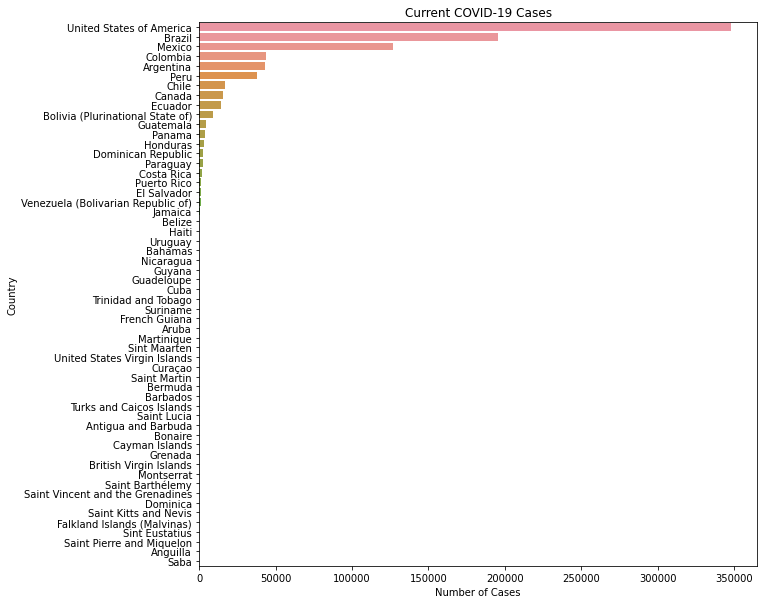

In [162]:

plot1 = d1.sort_values(by='Deaths - cumulative total', ascending=False)
plot1.rename(columns = {'Deaths - cumulative total':'total_case'}, inplace = True)

figure = plt.figure(figsize=(10,10))
sns.barplot(y=plot1.Name, x=plot1.total_case)
plt.xticks()
plt.xlabel('Number of Cases')
plt.ylabel('Country')
plt.title('Current COVID-19 Cases')
plt.show()

Continent Wise (Last 24 hrs count)

In [236]:
d2=df1.loc[df1['WHO Region']=='Africa', ['Name','Deaths - newly reported in last 24 hours']]
d2

,Name,Deaths - newly reported in last 24 hours
16,South Africa,402
69,Ethiopia,4
78,Algeria,0
80,Kenya,0
82,Nigeria,9
90,Ghana,0
100,Uganda,0
103,Cameroon,0
104,Namibia,2
107,Côte d’Ivoire,0


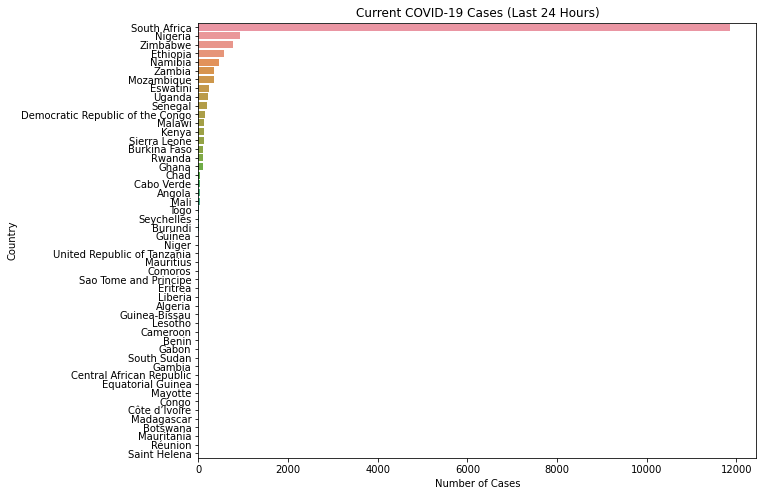

In [212]:

plot2 = d2.sort_values(by='Cases - newly reported in last 24 hours', ascending=False)
plot2.rename(columns = {'Cases - newly reported in last 24 hours':'total_case'}, inplace = True)

figure = plt.figure(figsize=(10,8))
sns.barplot(y=plot2.Name, x=plot2.total_case)
plt.xticks()
plt.xlabel('Number of Cases')
plt.ylabel('Country')
plt.title('Current COVID-19 Cases (Last 24 Hours)')
plt.show()

Continent wise (Last 7 days count)

In [213]:
d3=df1.loc[df1['WHO Region']=='Europe', ['Name','Cases - newly reported in last 7 days']]
d3

,Name,Cases - newly reported in last 7 days
4,Russian Federation,182103
5,The United Kingdom,366434
6,France,95268
7,Italy,107750
8,Spain,11989
...,...,...
192,Isle of Man,6
195,Guernsey,2
212,Greenland,1
213,Holy See,0


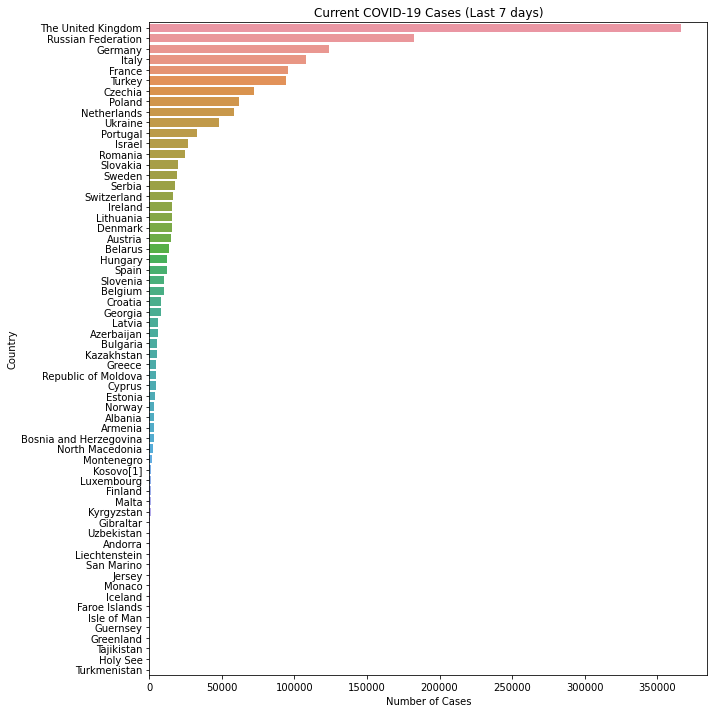

In [215]:

plot3 = d3.sort_values(by='Cases - newly reported in last 7 days', ascending=False)
plot3.rename(columns = {'Cases - newly reported in last 7 days':'total_case'}, inplace = True)

figure = plt.figure(figsize=(10,12))
sns.barplot(x=plot3.total_case,y=plot3.Name )
plt.xticks()
plt.xlabel('Number of Cases')
plt.ylabel('Country')
plt.title('Current COVID-19 Cases (Last 7 days)')
plt.show()

Continent Total Data

In [40]:
continents=['Americas', 'South-East Asia', 'Europe','Eastern Mediterranean', 'Africa', 'Western Pacific']
dic1={}
dic2={}

for i in continents:
    c1=df1.loc[df1['WHO Region']==i , ['Name','Cases - newly reported in last 24 hours','Deaths - newly reported in last 24 hours']]
    c1totalcase=sum(c1.iloc[:,1])
    c1totaldeath=sum(c1.iloc[:,2])
    #print(c1totalcase,',', c1totaldeath)
    dic1[i]=c1totalcase
    dic2[i]=c1totaldeath
    
print(dic1)
print(dic2)

{'Americas': 337231, 'South-East Asia': 26868, 'Europe': 173812, 'Eastern Mediterranean': 22351, 'Africa': 16932, 'Western Pacific': 6713}
{'Americas': 3545, 'South-East Asia': 448, 'Europe': 3022, 'Eastern Mediterranean': 411, 'Africa': 446, 'Western Pacific': 85}


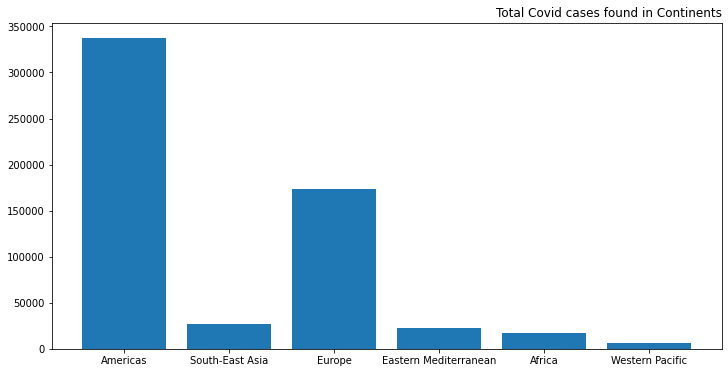

In [41]:
fig=plt.figure(figsize=(12,6))
plt.bar(dic1.keys(),dic1.values())
plt.title('Total Covid cases found in Continents',loc='right')
plt.show()

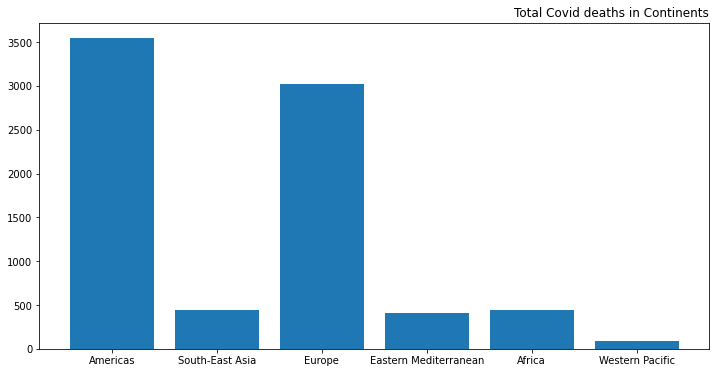

In [42]:
fig=plt.figure(figsize=(12,6))
plt.bar(dic2.keys(),dic2.values())
plt.title('Total Covid deaths in Continents',loc='right')
plt.show()

 Country specific Data 

In [237]:

d1=df.loc[df['location']=='Brazil']   #india,brazil,china,japan
d1.set_index('date',inplace=True)
d1=d1.loc['2020-09-15':'2020-11-15','new_cases']   # new_cases, new_deaths, 
#d1.index,d1.values
d1

date
2020-09-15    36653.0
2020-09-16    36820.0
2020-09-17    36303.0
2020-09-18    39797.0
2020-09-19    33057.0
               ...   
2020-11-11    48655.0
2020-11-12    33922.0
2020-11-13    29070.0
2020-11-14    38307.0
2020-11-15    14134.0
Name: new_cases, Length: 62, dtype: float64

In [238]:
d1v=[]
for i in d1.values:
    d1v.append(int(i))
#d1v

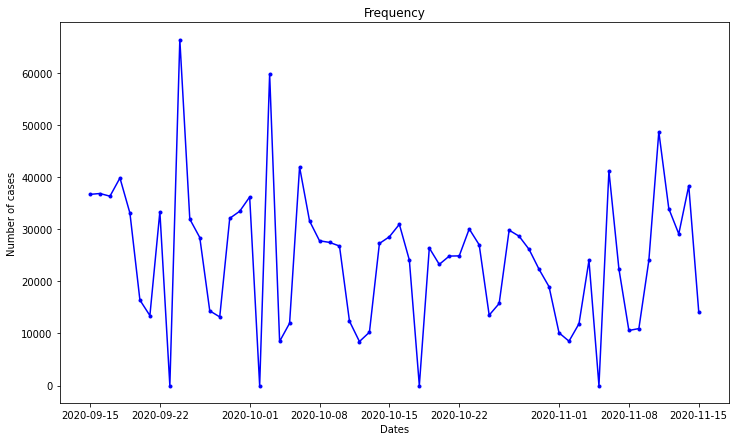

In [239]:
fig=plt.figure(figsize=(12,7))

plt.plot(d1.index,d1v,color='blue', marker='.')
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Frequency')
plt.show()

Compare between 2 or more countries

In [243]:
d2=df.loc[df['location']=='Japan']#india,brazil,china,japan
d3=df.loc[df['location']=='China']
d2.set_index('date',inplace=True)
d3.set_index('date',inplace=True)
d2=d2.loc['2020-12-01':'2020-12-30','new_cases']   # new_cases, new_deaths, total_cases, total_deaths
d3=d3.loc['2020-12-01':'2020-12-30','new_cases'] 
#d1.index,d1.values

In [244]:
d2v=[]
for i in d2.values:
    d2v.append(int(i))

d3v=[]
for i in d3.values:
    d3v.append(int(i))


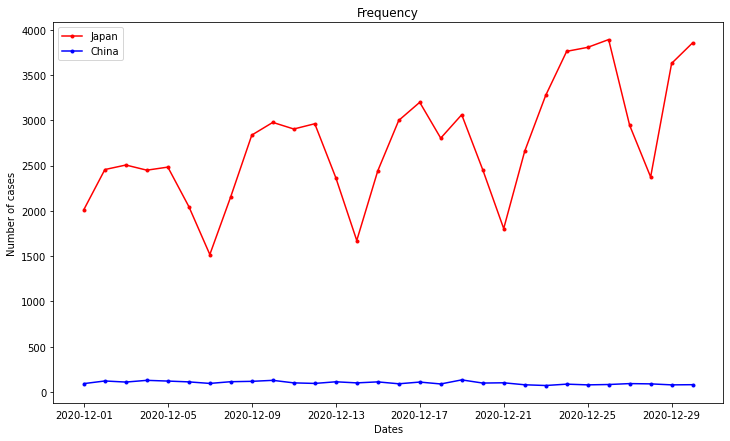

In [245]:
fig=plt.figure(figsize=(12,7))

plt.plot(d2.index,d2v,color='red', marker='.')
plt.plot(d2.index,d3v,color='blue', marker='.')
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.title('Frequency')
plt.legend(['Japan','China'])
plt.show()

SMOKERS

In [246]:
sm=df.loc[df['continent']=='South America']   #South America, Africa
#gdp.set_index('date',inplace=True)
sm=sm.loc[df['date']=='2020-03-01',['date','location','male_smokers','female_smokers']]   # new_cases, new_deaths, total_cases, total_deaths
#d1.index,d1.values
sm

,date,location,male_smokers,female_smokers
1853,2020-03-01,Argentina,27.7,16.2
7066,2020-03-01,Brazil,17.9,10.1
10431,2020-03-01,Chile,41.5,34.2
15326,2020-03-01,Ecuador,12.3,2.0


In [247]:
l1=list(sm['location'])
l2=list(sm['male_smokers'])
l3=list(sm['female_smokers'])

l1,l2,l3

(['Argentina', 'Brazil', 'Chile', 'Ecuador'],
 [27.7, 17.9, 41.5, 12.3],
 [16.2, 10.1, 34.2, 2.0])

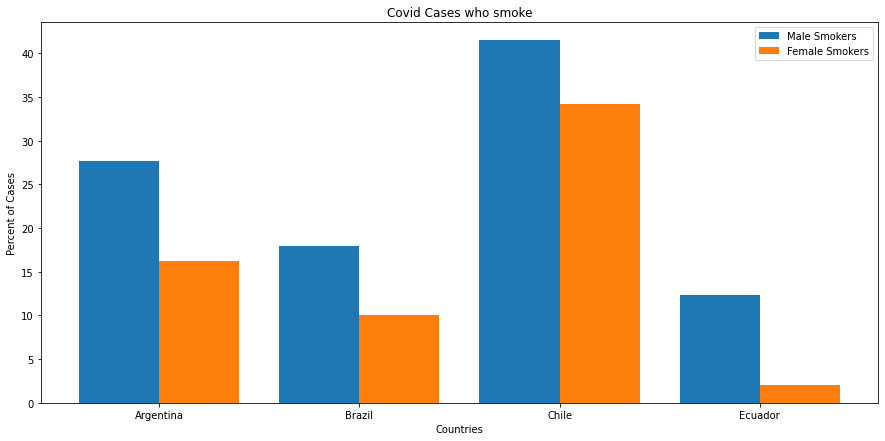

In [248]:
x=np.arange(sm.shape[0])
w=0.4
y= [i + w for i in x]

fig=plt.figure(figsize=(15,7))

plt.bar(x , l2 , w, label='Male Smokers')
plt.bar(y , l3 , w, label='Female Smokers')

plt.xlabel('Countries')
plt.ylabel('Percent of Cases')
plt.xticks(x+w/2,l1)
plt.title('Covid Cases who smoke')

plt.legend()
plt.show()

In [249]:
df_cases=df.loc[df['location']=='Japan',['date','new_cases']]

In [250]:
df_cases['date'] = df_cases['date'].dt.year.astype('str') + '-' + df_cases['date'].dt.month.astype('str') + '-01'
df_cases['date'] = pd.to_datetime(df_cases['date'])
#groupby date and sum the sales
df_cases = df_cases.groupby('date').new_cases.sum().reset_index()

In [251]:
df_cases

,date,new_cases
0,2020-01-01,13.0
1,2020-02-01,230.0
2,2020-03-01,2010.0
3,2020-04-01,12029.0
4,2020-05-01,2467.0
5,2020-06-01,1864.0
6,2020-07-01,17619.0
7,2020-08-01,32162.0
8,2020-09-01,15195.0
9,2020-10-01,17736.0


In [252]:
plot_data = [go.Scatter(x=df_cases['date'],y=df_cases['new_cases'],)]
plot_layout = go.Layout(title='Montly New Cases')
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

TYPE OF PATEINTS

In [ ]:
diabetes, bp, sugar          diaganosed accordingly

In [253]:
pat=df.loc[df['location']=='United States', ['date','location','icu_patients','hosp_patients']]   #Austria, US
pat.set_index('date',inplace=True)
pat=pat.loc['2020-06-30':'2020-07-30'] 

pat
#pat['icu_patients']

,location,icu_patients,hosp_patients
date,,,
2020-06-30,United States,5424.0,35335.0
2020-07-01,United States,5512.0,36569.0
2020-07-02,United States,5626.0,37627.0
2020-07-03,United States,5597.0,37927.0
2020-07-04,United States,5633.0,38281.0
2020-07-05,United States,5653.0,38872.0
2020-07-06,United States,5687.0,39970.0
2020-07-07,United States,5832.0,41957.0
2020-07-08,United States,5874.0,43204.0


In [254]:
p1=list(pat.index)
p2=list(pat['hosp_patients'])
p3=list(pat['icu_patients'])

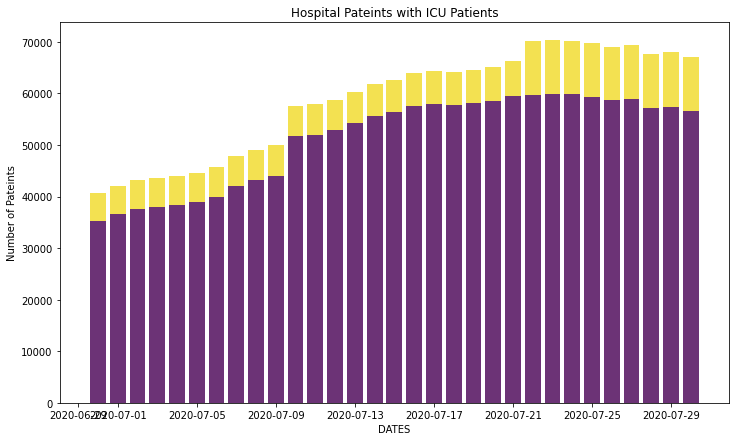

In [255]:
fig=plt.figure(figsize=(12,7))


plt.bar(p1, p2, color="#6c3376")

# the second one is special to create stacked bar plots
plt.bar(p1, p3, bottom=p2, color="#f3e151")

plt.xlabel('DATES')  
plt.ylabel('Number of Pateints')
plt.title('Hospital Pateints with ICU Patients')
plt.show()  

THANK YOU

In [72]:
#create a new dataframe to model the difference
df_diff = df_sales.copy()
#add previous sales to the next row
df_diff['prev_cases'] = df_diff['new_cases'].shift(1)
#drop the null values and calculate the difference
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['new_cases'] - df_diff['prev_cases'])
df_diff

,date,new_cases,prev_cases,diff
1,2020-02-01,2.0,1.0,1.0
2,2020-03-01,1394.0,2.0,1392.0
3,2020-04-01,33466.0,1394.0,32072.0
4,2020-05-01,155746.0,33466.0,122280.0
5,2020-06-01,394872.0,155746.0,239126.0
6,2020-07-01,1110507.0,394872.0,715635.0
7,2020-08-01,1995178.0,1110507.0,884671.0
8,2020-09-01,2621418.0,1995178.0,626240.0
9,2020-10-01,1871498.0,2621418.0,-749920.0
10,2020-11-01,1278727.0,1871498.0,-592771.0


In [73]:
#plot sales diff
plot_data = [
    go.Scatter(
        x=df_diff['date'],
        y=df_diff['diff'],
    )
]
plot_layout = go.Layout(
        title='Montly Cases Diff'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [18]:
df_supervised = df_diff.drop(['prev_cases'],axis=1)
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
#drop null values
#df_supervised = df_supervised.dropna().reset_index(drop=True)

In [19]:
df_supervised.fillna(0)

,date,new_cases,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
1,2020-02-01,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-01,1394.0,1392.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-04-01,33466.0,32072.0,1392.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-05-01,155746.0,122280.0,32072.0,1392.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-06-01,394872.0,239126.0,122280.0,32072.0,1392.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-07-01,1110507.0,715635.0,239126.0,122280.0,32072.0,1392.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2020-08-01,1995178.0,884671.0,715635.0,239126.0,122280.0,32072.0,1392.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2020-09-01,2621418.0,626240.0,884671.0,715635.0,239126.0,122280.0,32072.0,1392.0,1.0,0.0,0.0,0.0,0.0,0.0
9,2020-10-01,1871498.0,-749920.0,626240.0,884671.0,715635.0,239126.0,122280.0,32072.0,1392.0,1.0,0.0,0.0,0.0,0.0
10,2020-11-01,1278727.0,-592771.0,-749920.0,626240.0,884671.0,715635.0,239126.0,122280.0,32072.0,1392.0,1.0,0.0,0.0,0.0


In [20]:

# Define the regression formula
model = smf.ols(formula='diff ~ lag_1', data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.33984809187121745


In [6]:
import statsmodels.formula.api as smf
# Define the regression formula
model = smf.ols(formula='diff ~ lag_1 + lag_2 + lag_3+ lag_4+ lag_5', data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

NameError: name 'df_supervised' is not defined

In [30]:
from sklearn.preprocessing import MinMaxScaler
df_model = df_supervised.drop(['new_cases','date'],axis=1)
#split train and test set
train_set, test_set = df_model[0:-6].values, df_model[-6:].values

ModuleNotFoundError: No module named 'sklearn'